# Errors, exceptions and logging 

In [8]:
# 10.19.2021 - PHZ3150 fall

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### While getting to debug a code you make come across a range of different bugs: 
- Syntax errors   : say you forgot to add a ) or put one to many 
   - Python will let you know
- Runtime errors  : once code starts running something happens that wasn't supposed to --> exceptions 
   - Will need some debugging
- Semantic errors : code will run but not as it should, but as you told it to (but that is in a wrong way)
   - Can take a lot of debugging 

### Errors are generally fatal issues of your code that will kill the run. Exceptions can be handled without killing the code (if needed), warnings will generally not kill the code. 

### It is good practice to build a code that avoids errors and handles exceptions properly. When you share your code you want it to be used without (ideally any) debugging from someone else, so you should think of all issues that might arise...

### Python has a lot of built-in errors/exceptions that are raised every time you run into a bug. The ones you will encounter more often probably are:
- IO exceptions (e.g., filename not existing)
- EOF 
- Nameerror (e.g., call a non-existing variable)
- Indentation errors + tab errors
- Indexerror (e.g. you call element 11 of array with 9 elements)

### Your code can also keep on running and just raise some warnings
- Runtimewarning (see above for examples-- sth weird happens in your code)

### You can find the full list of exception and warnings here: https://docs.python.org/3/library/exceptions.html

## -------------------------
## Errors: 

In [10]:
#e.g.,:
a = [ 1, 2, 3, 4, 5 
print ( a * 2 )    # --> gets a built-in exception
     

SyntaxError: invalid syntax (<ipython-input-10-1feacb4a8649>, line 3)

In [11]:
#also in same family of errors:
a = 5

if a < 3:
print( a )


IndentationError: expected an indented block (<ipython-input-11-b758da39e685>, line 5)

In [12]:
# from ThinkPython2:
def print_twice( bruce ):
    print( bruce )
    print( bruce )

def cat_twice( part1, part2 ):
    cat = part1 + part2
    print_twice( cat )
    
    
line1 = 'Bing tiddle '
line2 = 'tiddle bang.'
cat_twice( line1, line2 )

#now let's print bruce and cat:
print( bruce, cat )   # --> gets a built-in exception

Bing tiddle tiddle bang.
Bing tiddle tiddle bang.


NameError: name 'bruce' is not defined

In [13]:
import myrandomfunction

ModuleNotFoundError: No module named 'myrandomfunction'

In [14]:
a = 4

b = [5, 6, 7

SyntaxError: unexpected EOF while parsing (<ipython-input-14-6334990e59f1>, line 3)

In [15]:
a = [ 1, 2, 3, 4, 5 ]

print( a[ 6 ] )

IndexError: list index out of range

In [16]:
a = open('testme.dat')

FileNotFoundError: [Errno 2] No such file or directory: 'testme.dat'

## -------------------------
## Warnings: 

In [17]:
# from ThinkPython2:
signal_power = 9
noise_power  = 10

ratio        = signal_power // noise_power
decibels     = 10 * np.log10(ratio)       # errs in this line and tells you why...

print(decibels)


-inf


/Users/theodora_karalidi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [19]:
# Code that gets array x and calcylates array y equal to sqrt( 1 - x **2 )

x = -10. + np.arange(0, 20.1, 0.1) 

y = np.zeros( len( x ) )

for i in range( len( x ) ):
#    breakpoint()          
    
    q1   = x[ i ]   ** 2.
    
    y1     = 1 - q1  
    
   
    y[ i ] = np.sqrt( y1 )
    

#print y:

print( y )

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

/Users/theodora_karalidi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


## -------------------------
## Exceptions:

### You can also make your own exceptions in Python:

#### for this you may need to define a class:

In [24]:
#make a custom error exception:

class CustomError(Exception):
    pass


# then in your code:
a = -5.         # this can be user input value e.g., or a variable passed
                # from another code..

#main body of code: 

if a > 0:
    print ('correct')                   # if value is positive, it's good...
else:
    raise CustomError("Wrong value!")   # if value is negative it's wrong -> make the code crash
    
print( a )

CustomError: Wrong value!

In [27]:
# examples in some code: 

#let's make a bunch of random exceptions/errors

class FluxIsNegative( Exception ):
    """ You flux is physically impossible ( < 0 ) """
    pass


class GoingTheWrongWay( Exception ):
    """ Your photon is moving the wrong way around """
    pass

    
flux, direction = input( " Give me your measured flux and its direction: " ).split() 

if float( flux ) < 0:
    raise FluxIsNegative
    
if float( direction ) < 0:
    raise GoingTheWrongWay
    


 Give me your measured flux and its direction: 10 -20


GoingTheWrongWay: 

In [28]:
# we can now make a class errors that will warn us about errors in our code:

class Error( Exception ):
    """Base class for other exceptions"""
    pass


class ValueTooSmallError( Error ):
    """ Raised when the input value is too small """
    pass 


class ValueTooLargeError( Error ):
    """ Raised when the input value is too large """
    pass




### what do you think this code does?

In [35]:
nums = input( "Give me a number : " )


if float( nums ) > 10. :
    raise ValueTooLargeError
elif float( nums ) < 10. :
    raise ValueTooSmallError
else:
    print( "You got the right number!" )
    

Give me a number : 10
You got the right number!


### You can also create exceptions that warn you but don't kill the code

In [1]:
names = [ 'emma.txt', 'first_data_read_plot.dat', 'Iamnothere.txt', 'distances_midterm.dat' ]

for nm in names:
    
    try:
        fin = open( nm )
        print( ' Opened file ', nm )
    except:
        print( 'File', nm, 'not there' )


 Opened file  emma.txt
 Opened file  first_data_read_plot.dat
File Iamnothere.txt not there
File distances_midterm.dat not there


### or you can even circumvent built in errors, e.g.:

In [38]:
while True:
    
    i = int( input( "Give index please" ) )
    
    try:  
        a = [ 1, 2, 3, 4, 5 ]
        print ( a[ i ] )  
    except LookupError:  
        print ("Error: list index out of range")
    else:  
        print ("Continue w/o error")
        # bla bla bla....rest of code here
        break    # we make it break for now to show it works
    
# see how while it would typically crash we got it to just give an error message ?

Give index please9
Error: list index out of range
Give index please12
Error: list index out of range
Give index please4
5
Continue w/o error


# ----------------------

### Many languages and programs use logging to keep track of what the code does, so that when it crashes you know what to look for. You can keep a 'log' with print() statements, but that is not ideal. Python offers a built in logging function, you simply need to import it.


### e.g.,  let's see this code:

In [39]:
names = [ 'emma.txt', 'first_data_read_plot.dat', 'Iamnothere.txt', 'distances_midterm.dat' ]

for nm in names:
    
    try:
        fin = open( nm )
        print( ' Opened file ', nm )
    except:
        print( 'File', nm, 'not there' )


File emma.txt not there
File first_data_read_plot.dat not there
File Iamnothere.txt not there
File distances_midterm.dat not there


###  you can see where the problem was here and go back and fix it.....but what if you want to keep a track of 1000s of files, and you have given it to someone else to run,  and it runs in a cluster, and.....

In [40]:
import logging 

### the logger gives you an interface to provide your log messages. There are different levels of severity of errors you might want to report/log:
- debug    ( debug msg )
- info     ( information about code )
- warnings ( warnings during runtime )
- error    ( error msg )
- critical ( aka, what killed your code )

### For more info see: https://docs.python.org/3/howto/logging.html

### Generally, only messages with severity of warning and above are printed

In [41]:
logging.debug('This is a debug message')
logging.info('This is an informative message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


### debug is only needed for someone that debugs and information are not critical to keep track of  --> a typical user of your code shouldn't need to debug, so you don't want to clutter them with info

In [42]:
# if you now chose to make a log to a file you can use the logger:
# good convection to follow (https://docs.python.org/3/howto/logging.html):
logger = logging.getLogger(__name__)
handler = logging.FileHandler('mylog.log')
handler.setLevel(logging.INFO)
logger.addHandler(handler)

#---then add your messages.
#before running, what will be saved in your log?
logger.debug('This is a debug message')
logger.info('This is an informative message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

ERROR:__main__:This is an error message
CRITICAL:__main__:This is a critical message


In [43]:
# you can also decide to add time-stamps which help with debugging 
# later (based on https://docs.python.org/3/library/logging.html): 

logger = logging.getLogger(__name__)

# create console handler and name and give their levels:
c_handler = logging.StreamHandler()
f_handler = logging.FileHandler('mylog2.log')
c_handler.setLevel(logging.WARNING)
f_handler.setLevel(logging.ERROR)

# add formatting for messages and timestamps
c_format = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
f_format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
c_handler.setFormatter(c_format)
f_handler.setFormatter(f_format)

# Add handlers to the logger
logger.addHandler(c_handler)
logger.addHandler(f_handler)

# call logger to write errors etc:
logger.debug('This is a debug message')
logger.info('This is an informative message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

__main__ - WARNING - This is a warning message
__main__ - ERROR - This is an error message
ERROR:__main__:This is an error message
__main__ - CRITICAL - This is a critical message
CRITICAL:__main__:This is a critical message


# -------------------------------------------------------------------
# -------------------------------------------------------------------

### Let's do some exercises now! 

### 1. You have lists f1 = [ 2, 12, 56, 42, 64, -4, 8, 42 ] and f2 = [ 5, 64, 34, -23, 42, 12, 0.01, 9 ]. 
1) Make a function divide( f1, f2) that takes as input two lists and returns a list whose elements are equal to the ratio of f2/f1. 

2) Turn f1 and f2 into numpy arrays. How can you do the devision? 

3) Return the index where list f1 equals to -4; and where array f2 is equal to 0.01 .

4) Print the n=5 element of f2

In [2]:
def ratio(f1, f2):
    f3 = []
    for i in range(len(f1)):
        f3.append(f2[i] / f1[i])
    return f3

In [8]:
f1 = [ 2, 12, 56, 42, 64, -4, 8, 42 ]
f2 = [ 5, 64, 34, -23, 42, 12, 0.01, 9 ]
print(ratio(f1,f2))
f1a = np.asarray(f1)
f2a = np.asarray(f2)
f3a = f2a / f1a
print(f3a)
print(f1.index(-4), f2.index(0.01))
print(f2[5])

[2.5, 5.333333333333333, 0.6071428571428571, -0.5476190476190477, 0.65625, -3.0, 0.00125, 0.21428571428571427]
[ 2.50000000e+00  5.33333333e+00  6.07142857e-01 -5.47619048e-01
  6.56250000e-01 -3.00000000e+00  1.25000000e-03  2.14285714e-01]
5 6
12


### 2. Debug the following code:



In [14]:
 def odd_numbers( N ): 
    """Prints all odd numbers up to number N.
    Input: N
    Output: print of numbers """
    
    q = 0
    tot = 0
    while q < N :
        if q % 2 == 1:
            print( q )
            tot += 1
        q = q + 1 
    return  tot


print( odd_numbers( 42 ) )

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
21


In [18]:
def end_of_year_interest( N, deposits_list ) :
    """Function that calculates the interest (assumed 4% ) gained per year for M years and 
    prints the total balance of savings account at the end of each year. 
    Input: N (interest in %), deposits_list (list with deposit $ for years 1 to M) 
    Output: total savings amount for years 1 to M """
    
    year_interest = []
    year_total    = []
    
    
    year_interest = [ deposits_list[ 0 ] *  N / 100.   ]
    year_total = [ deposits_list[ 0 ] *  ( 1 + N / 100. ) ]
    
    for i in range( 1, len( deposits_list ) ):
        
        interest_i   = ( year_total[ i -1] + deposits_list[ i ] ) *  N / 100. 
        year_total_i = ( year_total[ i -1] + deposits_list[ i ] ) * ( 1 + N / 100. )
    
        year_interest.append( interest_i )
        year_total.append( year_total_i )
    
    return year_total

In [20]:
totals = end_of_year_interest( 2, [  100, 300, 500 ] )
print(totals)

[102.0, 410.04, 928.2408]


### 3. Create a code that tells you what color your observed light is. The code should read in your log of "observations" from *my_random_observations.dat* and print out the color of each observation ('red', 'infrared', 'green' etc) and the corresponding energy of the light (remember that E = h c / $\lambda$ , with h = 6.62607004e-34 [m2 kg / s ]  and c =3e8 [m/s] ; also 1nm = 1e-9 [m] ). 
#### For your convenience the following image shows the wavelengths range of each color. Everything with  $\lambda$ > 700 nm you can label Infrared and everything with  $\lambda$ < 400 nm Utraviolet.

<img src="colors_wavs.png" width=350 height=350 />
source: https://en.wikipedia.org/wiki/Color 

In [34]:
#read the data in:
wav = np.loadtxt('my_random_observations.dat', skiprows = 1)

# now lets scan through the observations and produce the correct output:
data = wav[:,1]
observ = []
colors = {'Red': [700,635], 'Orange': [635, 590], 'Yellow': [590, 560], 'Green': [560, 520], 'Cyan': [520, 490], 'Blue': [490, 450], 'Violet': [450, 400]}
for i in data:
    if i > 700:
        observ.append('Infrared')
    if i < 400:
        observ.append('Ultraviolet')
    for j in colors:
        if colors[j][0] >= i >= colors[j][1]:
            observ.append(j)
for k in range(len(observ)):
    E = (6.626e-34)*(3e17)/(data[k])
    print('Photon ', k+1, ' was ', observ[k], ' with an energy of',np.format_float_scientific(E, precision = 3, exp_digits=2), 'J.')


# what is the color of the photons?

# what is the energy of the photons?
# h = 6.62607004e-34
#    c = 3e8



Photon  1  was  Yellow  with an energy of 3.524e-19 J.
Photon  2  was  Ultraviolet  with an energy of 6.412e-19 J.
Photon  3  was  Infrared  with an energy of 2.548e-19 J.
Photon  4  was  Infrared  with an energy of 2.008e-19 J.
Photon  5  was  Infrared  with an energy of 1.42e-19 J.
Photon  6  was  Green  with an energy of 3.681e-19 J.
Photon  7  was  Cyan  with an energy of 3.976e-19 J.


In [29]:
print(data)

[ 564.  310.  780.  990. 1400.  540.  500.]


### 4. Make a function circle that takes as input the radius of the circle and its center coordinates $x_0, y_0$ and returns the coordinates of all points of the circle in a list. Run it for $(x_0, y_0) = (0, 1) $ and radius $r = 2$. Plot your results using no line and red diamond markers

In [148]:
def circle(x0, y0, r):
    """Plots a circle given the x,y coordinates of the center and the radius."""
    x = np.arange(x0, x0 + r + (r/500), r/500)
    y = np.arange(y0, y0 + r + (r/500), r/500)
    xp = np.array(x0)
    yp = np.array(y0+r)
    for i in x:
        if i < (x0 + 0.5*r):  
            for j in y[::-1]:  #scans from top to bottom to save time
                r_c = ((i- x0)**2) + ((j - y0)**2) - (r**2)
                if abs(r_c) < 0.001:
                    xp = np.append(xp, i)  #only calculates points in the top right quarter of the circle
                    yp = np.append(yp, j)  
                
                    xp = np.append(xp, i)  #then translates each point to the other three quarters
                    yp = np.append(yp, 2*y0 -j)
                
                    xp = np.append(xp, 2*x0 - i)
                    yp = np.append(yp, j)
                
                    xp = np.append(xp, 2*x0 - i)
                    yp = np.append(yp, 2*y0 - j)
                    break  #stops after the first y value is found for each x
        else:
            for k in y:  #scans from the bottom up 
                r_c1 = ((i- x0)**2) + ((k - y0)**2) - (r**2)
                if abs(r_c1) < 0.001:
                    xp = np.append(xp, i)
                    yp = np.append(yp, k)
                
                    xp = np.append(xp, i)
                    yp = np.append(yp, 2*y0 - k)
                
                    xp = np.append(xp, 2*x0 - i)
                    yp = np.append(yp, k)
                
                    xp = np.append(xp, 2*x0 - i)
                    yp = np.append(yp, 2*y0 - k)
                    break
    plt.figure(figsize=(7,7))
    plt.plot(xp,yp,linestyle='none', marker='o', color='c')

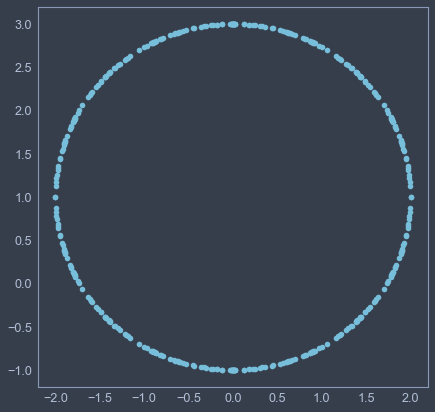

In [149]:
circle(0,1,2)